# Zebra Stripes as a Two-Dimensional Cellular Automaton
### Ashton T. Sperry
#### ashton.sperry@ronininstitute.org

This notebook contains code for modeling the creation of zebra stripes. It follows the process hypothesized by Alan Turing: https://www.lakeforest.edu/live/news/7986-the-turing-mechanism-how-did-the-leopard-get-his. My model uses different initial conditions (different radii and weights) from the leopard spots automaton--with a python class with all the necessary functions. Experiment with the initial conditions to create different patterns.

I modify the code from my colleagues Gordon Webster and Alex Lancaster's book Python for the Life Sciences (https://github.com/amberbiology/py4lifesci), and Allen Downey's book Think Complexity, 2nd edition (https://github.com/AllenDowney/ThinkComplexity2). Please contact me if you have any corrections, improvements, or questions.

In [1]:
from scipy.signal import correlate2d
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
class Stripes2D:
    """Represents a cellular automaton that creates zebra stripes."""

    def __init__(self, rows, cols = None, aw = 1, iw = -0.3):
        """Initializes the automaton.
        
        aw: represents the activator weight.
        iw: represents the inhibitor weight.
        
        cell: the numpy array that represents the automaton and contains the data.
        next: the second array on which the first array writes information."""
        self.rows = rows
        self.cols = rows if cols is None else cols
        
        self.aw = aw
        self.iw = iw
        
        self.cell = np.zeros((self.rows, self.cols), dtype = np.uint8)
        self.next = np.zeros_like(self.cell)

    def init_cells(self, row, col, *strings):
        """Adds cells at the given location.
        
        row: top row index.
        col: left col index.
        strings: list of strings of 0s and 1s."""
        for i, s in enumerate(strings):
            self.cell[row + i, col:col + len(s)] = np.array([int(b) for b in s])

    def init_random(self):
        """Start with random values across the array."""
        self.cell = np.random.randint(2, size = (self.rows, self.cols), dtype = np.uint8)

    def step(self):
        """Executes one time step of the entire array.
        
        activator kernel: represents the activator chemical process
        as a Moore(48) neighborhood. Has a radius of 3.
        
        inhibitor kernel: represents the inhibitor chemical process
        as a Moore(168) neighborhood. Has a radius of 6."""
        activator_kernel = np.array([[1, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 0, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 1]])

        inhibitor_kernel = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

        activating_cells = correlate2d(self.cell, activator_kernel, mode = 'same', boundary = 'wrap')
        inhibiting_cells = correlate2d(self.cell, inhibitor_kernel, mode = 'same', boundary = 'wrap')
    
        self.next = activating_cells * self.aw + inhibiting_cells * self.iw > 0
        self.next = self.next.astype(np.uint8)
    
        return self.next
    
    def anim_2D(self, steps):
        """Executes the animation for the automaton for the number of generations."""
        fig = plt.figure()
        ims = []
        
        for s in range(steps):
            im = plt.imshow(self.cell, cmap = 'binary', animated = True)
            ims.append([im])
            self.cell = self.step()
        
        plt.axis('image')
        plt.tick_params(axis = 'both', which = 'both', bottom = False, left = False,
                labelbottom = False, labelleft = False)

        anim = animation.ArtistAnimation(fig, ims, interval = 150, blit = True,
                                repeat_delay = 2000)
        
        #anim.save('game_of_life.mp4', writer = 'ffmpeg', fps = 5)
        return anim

I create the zebra stripes with the right parameters. It takes some experimentation.

<IPython.core.display.Javascript object>


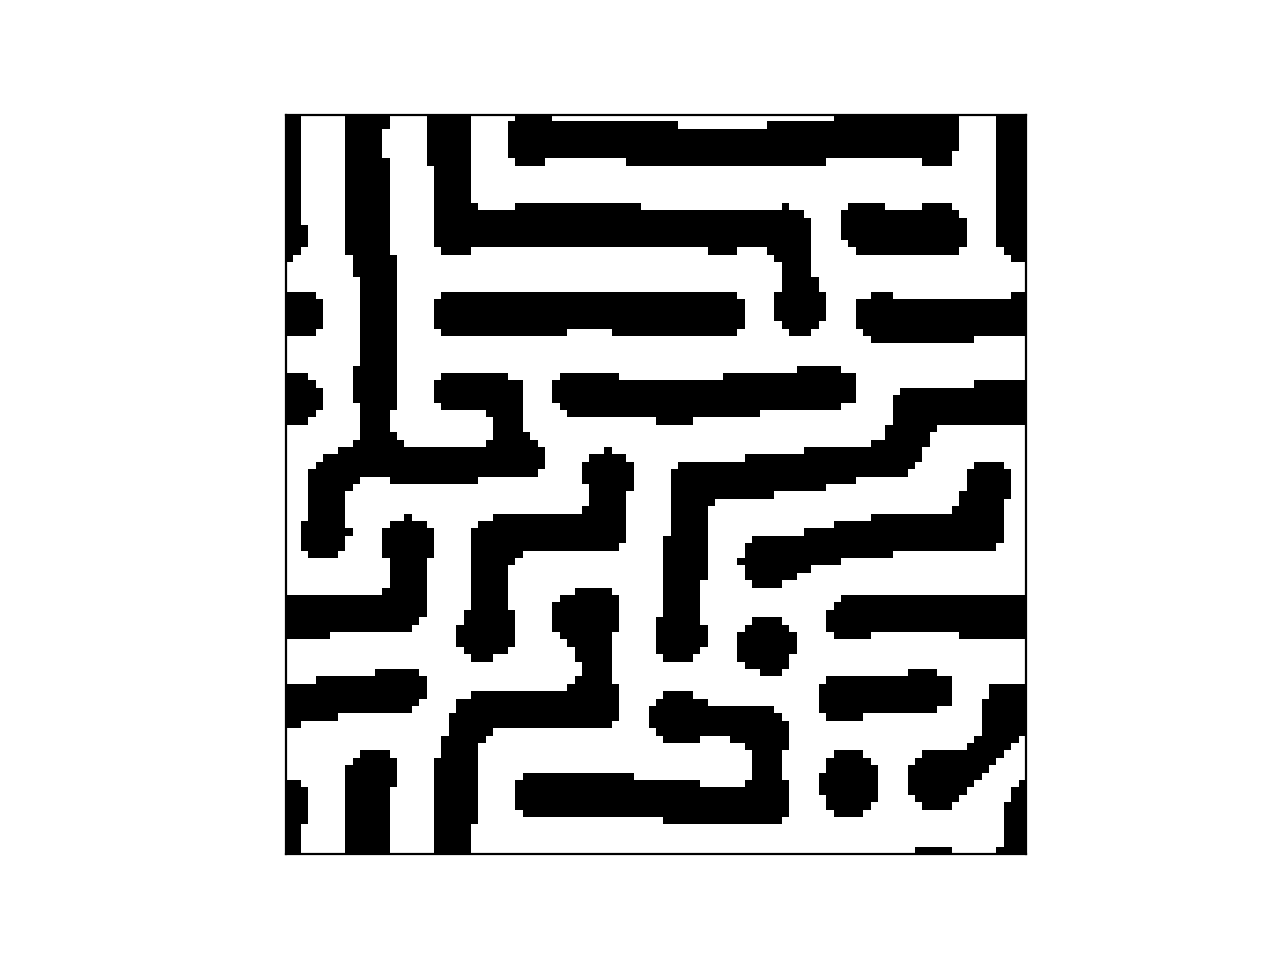

In [4]:
rows = 100
steps = 100

model = Stripes2D(rows)
model.init_random()
model.anim_2D(steps)